# Khám phá dữ liệu

## I. Tổng quan về dữ liệu

## 1. Thông tin cơ bản


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Đọc dataset
df = pd.read_csv('../data/clean_player_data.csv')

# In 5 dòng đầu của dữ liệu
print("\n5 dòng đầu:")
display(df.head())

# Số dòng và số cột
num_rows, num_cols = df.shape
print(f"Số dòng: {num_rows}")
print(f"Số cột: {num_cols}")

# Kích thước của dataset
dataset_size_mb = df.memory_usage(deep=True).sum() / (1024 * 1024)
print(f"Overall size: {dataset_size_mb:.2f} MB")


5 dòng đầu:


name  last_season    country_of_birth country_of_citizenship  \
0      Miroslav Klose         2015              Poland                Germany   
1  Roman Weidenfeller         2017             Germany                Germany   
2    Dimitar Berbatov         2015            Bulgaria               Bulgaria   
3               Lúcio         2012              Brazil                 Brazil   
4          Tom Starke         2017  East Germany (GDR)                Germany   

     sub_position    position   foot  height_in_cm contract_expiration_date  \
0  Centre-Forward      Attack  right        184.00                      NaN   
1      Goalkeeper  Goalkeeper   left        190.00                      NaN   
2  Centre-Forward      Attack    NaN           NaN                      NaN   
3     Centre-Back    Defender    NaN           NaN                      NaN   
4      Goalkeeper  Goalkeeper  right        194.00                      NaN   

             agent_name                                  current_club_name  \
0  ASBW Sport Marketing                      Società Sportiva Lazio S.p.A.   
1      Neubauer 13 GmbH                                  Borussia Dortmund   
2       CSKA-AS-23 Ltd.  Panthessalonikios Athlitikos Omilos Konstantin...   
3                   NaN                             Juventus Football Club   
4                   IFM                                  FC Bayern München   

   market_value_in_eur   Age  
0           1000000.00 47.00  
1            750000.00 45.00  
2           1000000.00 44.00  
3            200000.00 47.00  
4            100000.00 44.00

Số dòng: 32601
Số cột: 13
Overall size: 19.31 MB


### 2. Ý nghĩa mỗi dòng
Mỗi dòng là hồ sơ của một cầu thủ ở mùa giải gần nhất họ được ghi lại. 

### 3. Tính toàn vẹn dữ liệu.

Ta sẽ kiểm tra xem có dòng nào bị trùng lặp và có dòng nào trống hoàn toàn không. 
Với kiểm tra trùng lặp ta sử dụng các hàm `dupicated` và `sum` để kiểm tra xem có bao nhiêu dòng bị lặp và lưu vào biến `duplicates`.
Kiểm tra dòng trống hoàn toàn ta sử dụng `isnull`, `all` và `sum` để kiểm tra rồi lưu vào biến `empty_rows`.

In [18]:
# Kiểm tra dòng bị trùng lặp
duplicates = df.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicates}")

# Kiểm tra dòng trống hoàn toàn
empty_rows = df.isnull().all(axis=1).sum()
print(f"Số dòng trống hoàn toàn: {empty_rows}")

Số dòng bị trùng lặp: 0
Số dòng trống hoàn toàn: 0


### 4. Kiếm kê cột


#### 4.1: Ý nghĩa từng cột
* "name": Tên của cầu thủ
* "last_season": Mùa giải ghi nhận hồ sơ
* "country_of_birth": Đất nước sinh ra
* "country_of_citizenship": Quốc tịch của cầu thủ
* "sub_position": Vị trí thi đấu chi tiết của cầu thủ trên sân
* "foot": Chân thuận của cầu thủ
* "height_in_cm": Chiều cao của cầu thủ (Tính bằng cm)
* "contract_expiration_date": Ngày hết hạn hợp đồng của cầu thủ với clb
* "agent_name": Tên người/đơn vị quản lý của cầu thủ
* "current_club_name": Tên câu lạc bộ cầu thủ đang thi đấu
* "market_value_in_eur": Giá trị chuyển nhượng của cầu thủ tại thời điểm ghi nhận (tính bằng euro)


#### 4.2: Kiểu dữ liệu mỗi cột

In [19]:
# Kiểu dữ liệu mỗi cột
print("Current data types:")
print(df.dtypes)

Current data types:
name                         object
last_season                   int64
country_of_birth             object
country_of_citizenship       object
sub_position                 object
position                     object
foot                         object
height_in_cm                float64
contract_expiration_date     object
agent_name                   object
current_club_name            object
market_value_in_eur         float64
Age                         float64
dtype: object


### 5. Phân tích biến định lượng

### 5.1: Phân tích phân phối
Sử dụng hàm `describer` để xem thống kê mô tả cho các cột biến định lượng

In [20]:
# Danh sách cột số cần phân tích
numerical_cols = ['last_season', 'height_in_cm', 'market_value_in_eur', 'Age']

# Lấy thống kê mô tả CHỈ cho các cột này
stats = df[numerical_cols].describe().T

# Tạo cột median từ cột 50%
stats['median'] = stats['50%']

# Sắp xếp lại thứ tự cột cho dễ nhìn
columns_order = ['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max']
final_table = stats[columns_order]

# Định dạng hiển thị số thực (2 chữ số thập phân)
pd.options.display.float_format = '{:.2f}'.format

# Hiển thị bảng
display(final_table)

count       mean        std      min       25%  \
last_season         32601.00    2019.36       3.96  2012.00   2016.00   
height_in_cm        30345.00     182.29       7.04    17.00    178.00   
market_value_in_eur 31078.00 1639685.31 6407293.18 10000.00 100000.00   
Age                 32554.00      30.37       6.65    16.00     25.00   

                       median       75%          max  
last_season           2020.00   2023.00      2024.00  
height_in_cm           183.00    187.00       210.00  
market_value_in_eur 250000.00 700000.00 200000000.00  
Age                     30.00     35.00        57.00

### 5.2: Trực quan hóa
Vẽ biểu đồ Histogram (để xem phân phối) và Box Plot (để xem outliers) cho từng cột số.

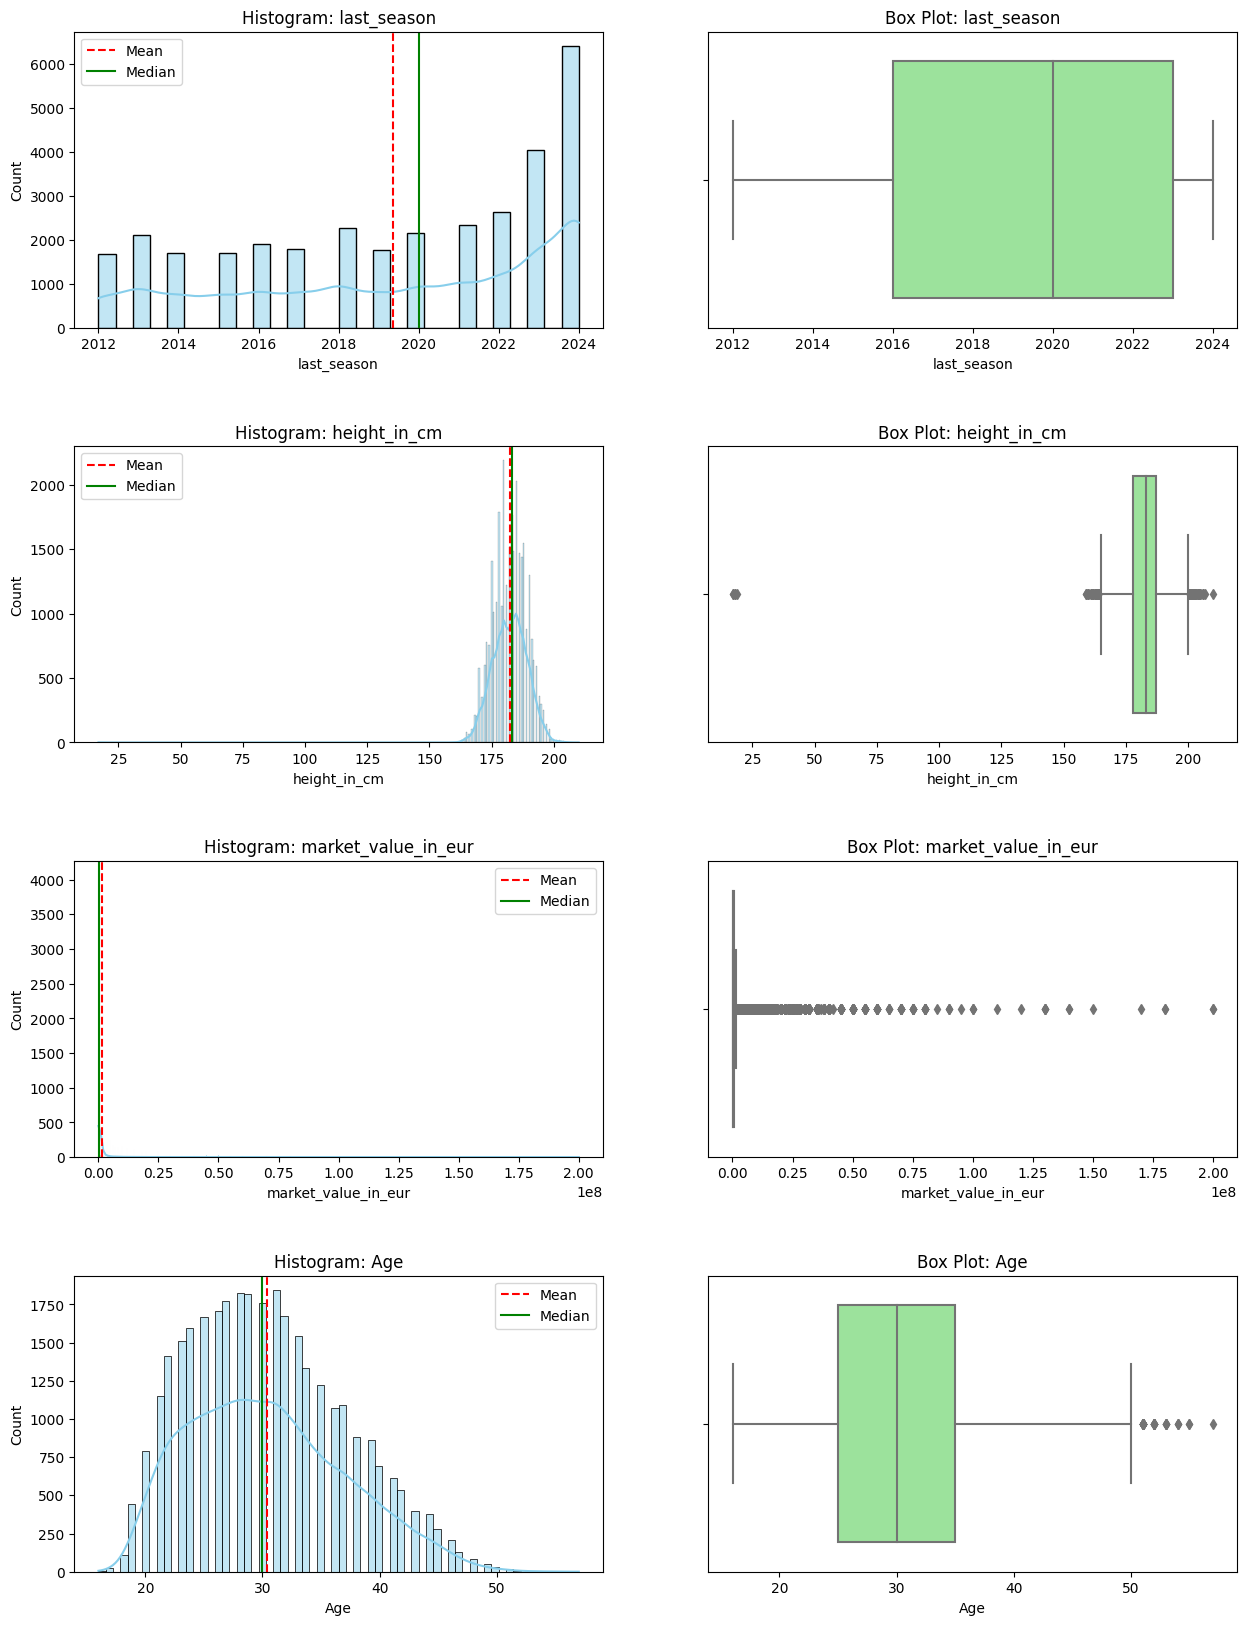

In [21]:

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.4) # Khoảng cách giữa các hàng

for i, col in enumerate(numerical_cols):
    # Lấy dữ liệu (bỏ giá trị null để vẽ không bị lỗi)
    col_data = df[col].dropna()

    # 1. Vẽ Histogram (Biểu đồ phân phối)
    sns.histplot(col_data, kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Histogram: {col}')
    axes[i, 0].axvline(col_data.mean(), color='red', linestyle='--', label='Mean')
    axes[i, 0].axvline(col_data.median(), color='green', linestyle='-', label='Median')
    axes[i, 0].legend()

    # 2. Vẽ Box Plot (Biểu đồ hộp)
    sns.boxplot(x=col_data, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Box Plot: {col}')

plt.show()

### 5.3: Phân tích phạm vi và outlier
Sử dụng IQR để tính toán các giá trị ngoại lai

In [22]:
for col in numerical_cols:
    col_data = df[col].dropna()
    
    # Min/Max
    min_val = col_data.min()
    max_val = col_data.max()
    
    # Tính toán IQR
    Q1 = col_data.quantile(0.25)
    Q3 = col_data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Đếm số lượng outliers
    outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
    num_outliers = len(outliers)
    
    print(f"\nCột: {col}")
    print(f"- Min: {min_val} | Max: {max_val}")
    print(f"- Số lượng Outliers: {num_outliers}")
    if num_outliers > 0:
        print(f"- Ví dụ vài giá trị outliers: {outliers.head(3).tolist()}")


Cột: last_season
- Min: 2012 | Max: 2024
- Số lượng Outliers: 0

Cột: height_in_cm
- Min: 17.0 | Max: 210.0
- Số lượng Outliers: 146
- Ví dụ vài giá trị outliers: [201.0, 164.0, 205.0]

Cột: market_value_in_eur
- Min: 10000.0 | Max: 200000000.0
- Số lượng Outliers: 4387
- Ví dụ vài giá trị outliers: [2000000.0, 11000000.0, 2500000.0]

Cột: Age
- Min: 16.0 | Max: 57.0
- Số lượng Outliers: 39
- Ví dụ vài giá trị outliers: [51.0, 52.0, 52.0]


### 5.4: Kiểm tra chất lượng dữ liệu
Kiểm tra xem tỷ lệ giá trị bị thiếu và những giá trị phi lý

In [23]:
print("--- Kiểm tra Chất lượng Dữ liệu ---\n")

# 1. Tỷ lệ dữ liệu bị thiếu
missing_info = df[numerical_cols].isnull().mean() * 100
print("Tỷ lệ giá trị bị thiếu (%):")
print(missing_info)

# 2. Kiểm tra các giá trị phi lý (Impossible Values)
print("\nKiểm tra Logic cụ thể:")

# Kiểm tra tuổi âm
negative_age = (df['Age'] < 0).sum()
print(f"- Số lượng tuổi âm: {negative_age}")

# Kiểm tra chiều cao vô lý
weird_height = (df['height_in_cm'] < 100).sum()
print(f"- Số lượng chiều cao < 100cm: {weird_height}")
if weird_height > 0:
    print("  -> Các giá trị chiều cao sai cụ thể:", df[df['height_in_cm'] < 100]['height_in_cm'].tolist())

# Kiểm tra giá trị thị trường âm hoặc bằng 0 
zero_market_value = (df['market_value_in_eur'] <= 0).sum()
print(f"- Số lượng giá trị thị trường <= 0: {zero_market_value}")

--- Kiểm tra Chất lượng Dữ liệu ---

Tỷ lệ giá trị bị thiếu (%):
last_season           0.00
height_in_cm          6.92
market_value_in_eur   4.67
Age                   0.14
dtype: float64

Kiểm tra Logic cụ thể:
- Số lượng tuổi âm: 0
- Số lượng chiều cao < 100cm: 5
  -> Các giá trị chiều cao sai cụ thể: [19.0, 18.0, 18.0, 17.0, 17.0]
- Số lượng giá trị thị trường <= 0: 0


## 6. Phân tích biến phân loại

### 6.1: Phân phối giá trị
Phân tích thống kê chi tiết số lượng giá trị và các giá trị phổ biến

In [25]:
cat_cols = ['sub_position', 'foot', 'country_of_citizenship', 'agent_name', 'current_club_name', 'contract_expiration_date']

print("--- THỐNG KÊ CHI TIẾT: SỐ LƯỢNG GIÁ TRỊ & TOP PHỔ BIẾN ---")

for col in cat_cols:
    if col in df.columns:
        print(f"\n==================================================")
        print(f"CỘT: {col}")
        
        # 1. Đếm số lượng giá trị duy nhất (Unique)
        unique_count = df[col].nunique()
        print(f"• Số lượng giá trị duy nhất (Unique Values): {unique_count}")
        
        # 2. Liệt kê Top 10 giá trị xuất hiện nhiều nhất
        print(f"• Top 5 Giá trị phổ biến nhất:")
        # Lấy top 10 và hiển thị
        top_10 = df[col].value_counts().head(5)
        print(top_10)

--- THỐNG KÊ CHI TIẾT: SỐ LƯỢNG GIÁ TRỊ & TOP PHỔ BIẾN ---

CỘT: sub_position
• Số lượng giá trị duy nhất (Unique Values): 13
• Top 5 Giá trị phổ biến nhất:
sub_position
Centre-Back           5744
Centre-Forward        4578
Central Midfield      3782
Goalkeeper            3720
Defensive Midfield    2662
Name: count, dtype: int64

CỘT: foot
• Số lượng giá trị duy nhất (Unique Values): 3
• Top 5 Giá trị phổ biến nhất:
foot
right    21149
left      7530
both      1386
Name: count, dtype: int64

CỘT: country_of_citizenship
• Số lượng giá trị duy nhất (Unique Values): 183
• Top 5 Giá trị phổ biến nhất:
country_of_citizenship
Spain      1965
Italy      1887
France     1761
Brazil     1629
England    1588
Name: count, dtype: int64

CỘT: agent_name
• Số lượng giá trị duy nhất (Unique Values): 2897
• Top 5 Giá trị phổ biến nhất:
agent_name
Wasserman              504
CAA Stellar            374
ProStar                374
CAA Base Ltd           302
Unique Sports Group    257
Name: count, dtype: in

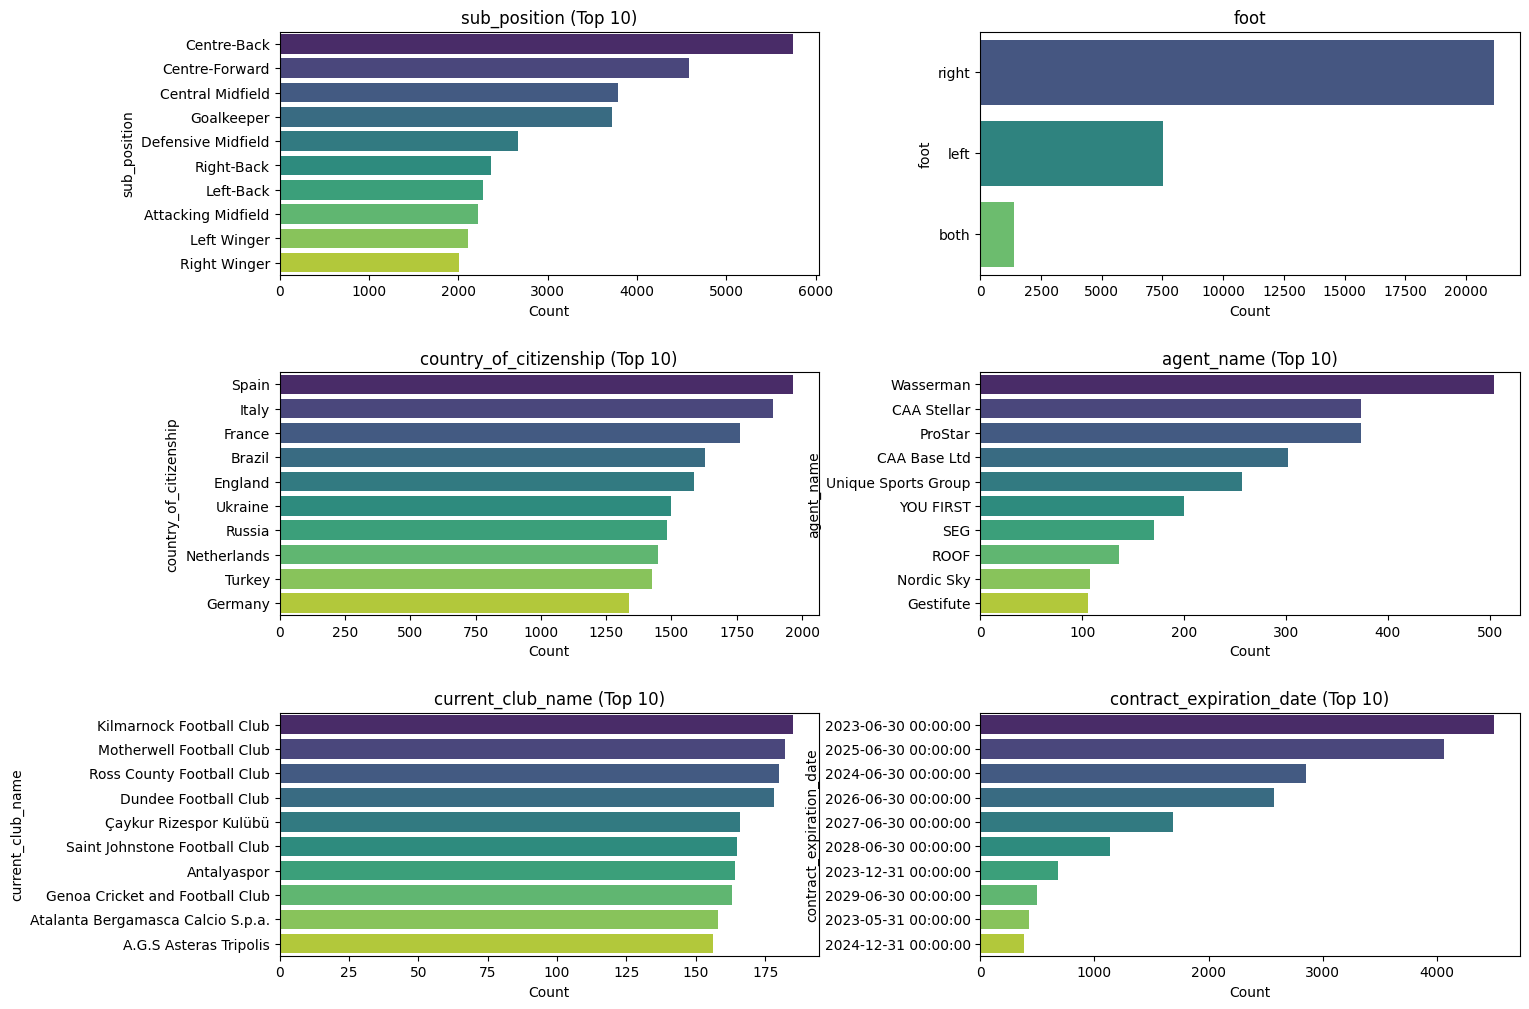

In [26]:

# 1. Visualize Distributions
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts()
    

    if len(counts) > 10:
        plot_data = counts.head(10)
        title = f'{col} (Top 10)'
    else:
        plot_data = counts
        title = col
        
    sns.barplot(
        x=plot_data.values, 
        y=plot_data.index, 
        ax=axes[i], 
        palette='viridis'
    )
    
    axes[i].set_title(title)
    axes[i].set_xlabel('Count')

plt.show()

### 6.3. Kiểm tra chất lượng

In [27]:
print("=== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU PHÂN LOẠI ===")
print(f"{'Cột':<25} | {'Missing (%)':<12} | {'Inconsistencies?':<15} | {'Abnormal?':<12} | {'Rare Categories (<1%)':<20}")
print("-" * 95)

for col in cat_cols:
    col_data = df[col]
    
    # Missing Values ---
    missing_pct = col_data.isnull().mean() * 100
    
    # Tính nhất quán
    if col_data.dtype == 'object':
        valid_vals = col_data.dropna().astype(str)
        unique_orig = valid_vals.nunique()
        unique_lower = valid_vals.str.lower().nunique()
        has_inconsistency = "YES" if unique_orig > unique_lower else "No"
    else:
        has_inconsistency = "N/A"
        
    # Giá trị bất thường
    suspicious_list = ["Missing", "missing", "Unknown", "?", "N/A", "null"]
    found_abnormal = []
    if col_data.dtype == 'object':
        for val in suspicious_list:
            if (col_data == val).any():
                found_abnormal.append(val)
    abnormal_status = ", ".join(found_abnormal) if found_abnormal else "No"

    # Phân nhóm
    counts = col_data.value_counts(normalize=True)
    rare_cats = counts[counts < 0.01]
    num_rare = len(rare_cats)
    total_cats = len(counts)
    
    grouping_suggestion = f"{num_rare}/{total_cats}"
    
    print(f"{col:<25} | {missing_pct:>10.2f}% | {has_inconsistency:<15} | {abnormal_status:<12} | {grouping_suggestion:<20}")

print("-" * 95)
print("(*) Rare Categories: Số lượng nhóm chiếm < 1% dữ liệu / Tổng số nhóm.")
print("    Không nên gom nhóm vì đây là các biến đặc biệt, gom nhóm sẽ mất đi đặc trưng")

print("\n[Chi tiết] Ví dụ về lỗi không nhất quán trong 'agent_name':")
agents = df['agent_name'].dropna().astype(str)
seen = {}
duplicates = []
for val in agents.unique():
    lower_val = val.lower()
    if lower_val in seen:
        duplicates.append(f"'{seen[lower_val]}' vs '{val}'")
    else:
        seen[lower_val] = val

if duplicates:
    print("Tìm thấy các cặp trùng lặp (khác nhau chữ hoa/thường):")
    for d in duplicates[:5]: 
        print(f" - {d}")
else:
    print("Không tìm thấy lỗi nào.")

=== BÁO CÁO CHẤT LƯỢNG DỮ LIỆU PHÂN LOẠI ===
Cột                       | Missing (%)  | Inconsistencies? | Abnormal?    | Rare Categories (<1%)
-----------------------------------------------------------------------------------------------
sub_position              |       0.55% | No              | No           | 1/13                
foot                      |       7.78% | No              | No           | 0/3                 
country_of_citizenship    |       1.17% | No              | No           | 164/183             
agent_name                |      49.14% | YES             | No           | 2890/2897           
current_club_name         |       0.00% | No              | No           | 437/437             
contract_expiration_date  |      37.09% | No              | No           | 107/119             
-----------------------------------------------------------------------------------------------
(*) Rare Categories: Số lượng nhóm chiếm < 1% dữ liệu / Tổng số nhóm.
    Không nên gom 

### 7. Phân tích Dữ liệu Khuyết thiếu (Missing Data Analysis)

#### 7.1. Tính toán Tỷ lệ Khuyết thiếu

Phần này nhằm mục đích xác định và đánh giá mức độ nghiêm trọng của dữ liệu khuyết thiếu trong bộ dữ liệu. Việc hiểu rõ dữ liệu khuyết thiếu là bước quan trọng đầu tiên để quyết định chiến lược tiền xử lý phù hợp (như điền giá trị thiếu, loại bỏ cột/hàng, v.v.).

Bảng trên hiển thị các cột có dữ liệu khuyết thiếu, sắp xếp theo tỷ lệ phần trăm giảm dần.

In [72]:
# Thiết lập style cho trực quan hóa
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Bảng tóm tắt giá trị khuyết thiếu
print("=" * 80)
print("TÓM TẮT DỮ LIỆU KHUYẾT THIẾU")
print("=" * 80)

# Tính toán các giá trị khuyết thiếu
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100),
    'Data_Type': df.dtypes
})

# Sắp xếp theo tỷ lệ khuyết thiếu (giảm dần)
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values(
    'Missing_Percentage', ascending=False
).reset_index(drop=True)

print(f"\nTổng số dòng trong dataset: {len(df):,}")
print(f"Số cột có giá trị khuyết thiếu: {len(missing_data)}/{len(df.columns)}")
print(f"Tổng thể dữ liệu khuyết thiếu: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%\n")

if not missing_data.empty:
    display_df = missing_data.copy()
    
    display_df.rename(columns={
        'Column': 'Tên Cột',
        'Missing_Count': 'Số Lượng Thiếu',
        'Missing_Percentage': 'Tỷ Lệ Thiếu (%)',
        'Data_Type': 'Kiểu Dữ Liệu'
    }, inplace=True)
    
    # Định dạng lại cột tỷ lệ phần trăm
    display_df['Tỷ Lệ Thiếu (%)'] = display_df['Tỷ Lệ Thiếu (%)'].map('{:.2f}%'.format)

    print(display_df.to_string(index=False))
else:
    print("Không tìm thấy giá trị khuyết thiếu nào trong dataset!")

TÓM TẮT DỮ LIỆU KHUYẾT THIẾU

Tổng số dòng trong dataset: 32,601
Số cột có giá trị khuyết thiếu: 9/13
Tổng thể dữ liệu khuyết thiếu: 8.93%

                 Tên Cột  Số Lượng Thiếu Tỷ Lệ Thiếu (%) Kiểu Dữ Liệu
              agent_name           16019          49.14%       object
contract_expiration_date           12091          37.09%       object
        country_of_birth            2799           8.59%       object
                    foot            2536           7.78%       object
            height_in_cm            2256           6.92%      float64
     market_value_in_eur            1523           4.67%      float64
  country_of_citizenship             383           1.17%       object
            sub_position             180           0.55%       object
                     Age              47           0.14%      float64


#### 7.2. Trực quan hóa Dữ liệu Khuyết thiếu

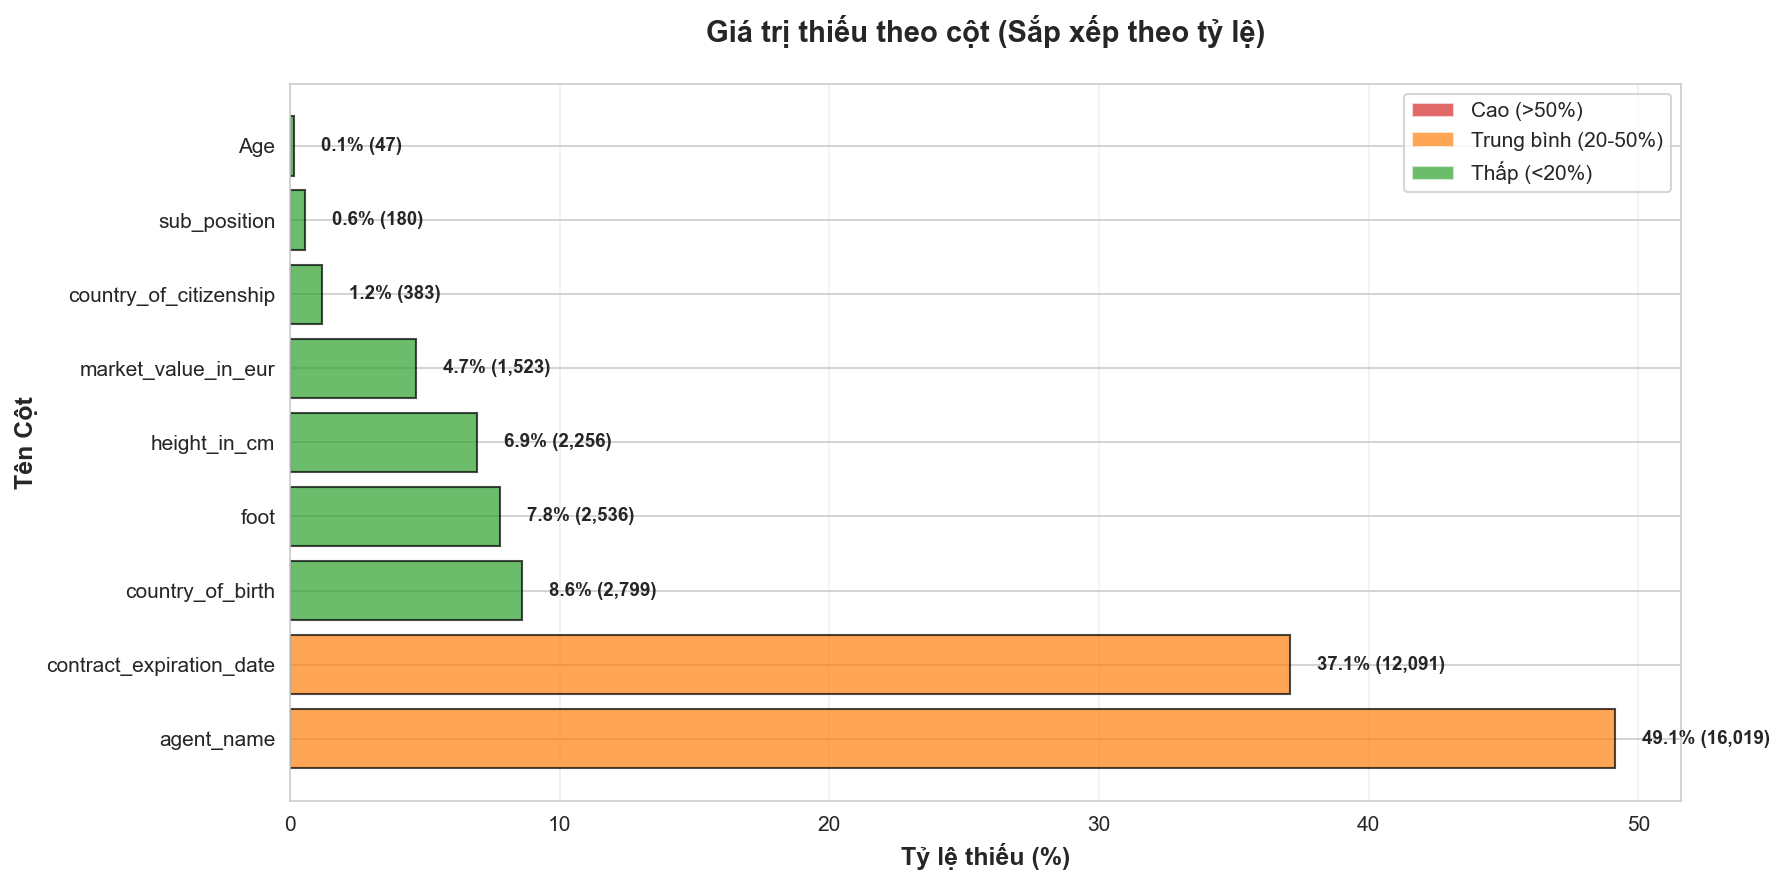

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=150) # Tăng DPI để ảnh nét hơn

if len(missing_data) > 0:
    # Xác định màu sắc cho các thanh dựa trên tỷ lệ thiếu
    colors = ['#d62728' if x > 50 else '#ff7f0e' if x > 20 else '#2ca02c' 
              for x in missing_data['Missing_Percentage']]
    
    # Vẽ biểu đồ thanh ngang
    bars = ax.barh(missing_data['Column'], missing_data['Missing_Percentage'], 
                   color=colors, alpha=0.7, edgecolor='black')
    
    # Thêm nhãn phần trăm và số lượng cụ thể
    for i, (idx, row) in enumerate(missing_data.iterrows()):
        ax.text(row['Missing_Percentage'] + 1, i, 
                f"{row['Missing_Percentage']:.1f}% ({int(row['Missing_Count']):,})",
                va='center', fontsize=9, fontweight='bold')
    
    # Thiết lập nhãn và tiêu đề
    ax.set_xlabel('Tỷ lệ thiếu (%)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Tên Cột', fontsize=12, fontweight='bold')
    ax.set_title('Giá trị thiếu theo cột (Sắp xếp theo tỷ lệ)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.grid(axis='x', alpha=0.3)
    
    # Thêm chú thích màu sắc
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='#d62728', alpha=0.7, label='Critical (>50%)'),
        Patch(facecolor='#ff7f0e', alpha=0.7, label='Moderate (20-50%)'),
        Patch(facecolor='#2ca02c', alpha=0.7, label='Low (<20%)')
    ]
    ax.legend(handles=legend_elements, loc='upper right')
    
else:
    # Hiển thị thông báo nếu không có dữ liệu thiếu
    ax.text(0.5, 0.5, 'Không có giá trị thiếu trong Dataset', 
            ha='center', va='center', fontsize=16, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

### **➤ NHẬN XÉT:**

#### **1. Phân tầng mức độ nghiêm trọng (Severity Stratification)**
Biểu đồ cho thấy sự phân hóa rõ rệt về chất lượng dữ liệu giữa các thuộc tính, chia làm 3 nhóm hành động chính:

*   **Nhóm "Cảnh báo cao" (Moderate Impact):**
    *   `agent_name` (49.1%) và `contract_expiration_date` (37.1%) có tỷ lệ khuyết thiếu rất lớn.
    *   **Insight:** Việc `agent_name` thiếu gần một nửa dữ liệu có thể không phải là lỗi thu thập (MCAR) mà mang tính hệ thống (MNAR - Missing Not At Random). Có khả năng cao các cầu thủ này là cầu thủ trẻ, cầu thủ tự do, hoặc thuộc các giải đấu thấp không có người đại diện chuyên nghiệp.
    *   **Giải pháp xử lý đề xuất:** Không nên xóa các dòng này (sẽ mất ~50% dữ liệu) cũng không nên điền bằng Mode. Thay vào đó, nên xử lý bằng **Feature Engineering**: Tạo nhóm mới như *"No Agent"* hoặc biến đổi thành biến nhị phân `has_agent` (0/1). Tương tự với ngày hết hạn hợp đồng, có thể gán giá trị *"Unknown"* hoặc tính toán dựa trên quy luật nếu có.

*   **Nhóm "Nhạy cảm" (Key Variable Impact):**
    *   `market_value_in_eur` (4.7%): Mặc dù tỷ lệ thiếu thấp, nhưng đây thường là biến mục tiêu (Target Variable) hoặc biến quan trọng để phân cụm.
    *   **Giải pháp xử lý đề xuất:** Việc impute (điền giá trị) cho biến mục tiêu có thể đưa nhiễu (bias) vào mô hình. Với tỷ lệ thấp (4.7%), giải pháp an toàn nhất là **loại bỏ (drop)** các dòng này để đảm bảo độ sạch của dữ liệu huấn luyện (Ground Truth), trừ khi ta đang muốn dự đoán chính giá trị này.

*   **Nhóm "Xử lý tiêu chuẩn" (Low Impact):**
    *   Các biến như `country_of_birth` (8.6%), `foot` (7.8%), `height_in_cm` (6.9%) và các biến còn lại.
    *   **Giải pháp xử lý đề xuất:** Sử dụng kỹ thuật điền khuyết cơ bản:
        *   *Biến định lượng (height):* Điền bằng **Mean** hoặc **Median** (kiểm tra phân phối trước).
        *   *Biến định danh (foot, country):* Điền bằng **Mode** hoặc nhóm *"Unknown"*.

#### **2. Kết luận tổng quan**
*   **Không có biến nào thuộc nhóm "Báo động đỏ" (`Critical > 50%`):** Đây là một ưu điểm lớn về chất lượng dữ liệu. Trong quy trình Data Science, các biến thiếu trên 50% thường bị loại bỏ (drop) ngay lập tức vì việc khôi phục (imputation) sẽ tạo ra quá nhiều dữ liệu giả, làm sai lệch mô hình. Việc không có cột nào rơi vào nhóm này đồng nghĩa với việc **ta có thể giữ lại toàn bộ các trường thông tin (features)** để phục vụ phân tích mà không cần cắt bỏ bất kỳ đặc trưng nào của cầu thủ.
*   **Tính phản ánh thực tế (Domain Reality):** Sự thiếu hụt tập trung ở nhóm `Moderate (20-50%)` thay vì rải rác ngẫu nhiên phản ánh đúng đặc thù của bóng đá: các thông tin về kỹ thuật/thể chất (chiều cao, chân thuận) dễ quan sát nên rất đầy đủ (nhóm `Low`), trong khi thông tin thương mại (hợp đồng, người đại diện) thường mang tính bảo mật hoặc không tồn tại ở các cầu thủ cấp thấp. Do đó, dữ liệu này đủ "sạch" và "thật" để xây dựng các mô hình định giá.

**Chiến lược tiền xử lý (Preprocessing Strategy):**
1.  **Giữ lại và gán nhãn** cho nhóm thương mại.
2.  **Loại bỏ dòng thiếu** ở biến mục tiêu.
3.  **Điền giá trị** cho các thuộc tính thể chất.


In [75]:
# Heatmap (Bản đồ nhiệt) dữ liệu khuyết thiếu

if len(missing_data) > 0:
    missing_cols = missing_data['Column'].tolist()
    
    # Tạo các nhóm (bin) cho các dòng (ví dụ: mỗi 50 dòng)
    bin_size = 50
    n_bins = len(df) // bin_size + (1 if len(df) % bin_size != 0 else 0)
    
    # Tính toán tỷ lệ khuyết thiếu cho mỗi nhóm (bin)
    aggregated_missing = []
    bin_labels = []
    
    for i in range(n_bins):
        start_idx = i * bin_size
        end_idx = min((i + 1) * bin_size, len(df))
        
        # Tính toán tỷ lệ phần trăm giá trị thiếu trong nhóm này cho mỗi cột
        bin_missing = df[missing_cols].iloc[start_idx:end_idx].isnull().mean() * 100
        aggregated_missing.append(bin_missing)
        bin_labels.append(f"{start_idx}-{end_idx}")
    
    # Chuyển đổi sang DataFrame
    aggregated_df = pd.DataFrame(aggregated_missing, 
                                 columns=missing_cols,
                                 index=bin_labels)
    
    # Tạo hình ảnh
    fig, ax = plt.subplots(figsize=(14, max(8, n_bins * 0.3)), dpi = 150)
    
    # Tạo heatmap với bảng màu tốt hơn
    sns.heatmap(aggregated_df, 
                cmap='RdYlGn_r',  # Đỏ cho tỷ lệ thiếu cao, Xanh cho tỷ lệ thấp
                annot=True,  # Hiển thị phần trăm
                fmt='.1f',  # Một chữ số thập phân
                cbar_kws={'label': 'Tỷ lệ dữ liệu thiếu (%)'},
                linewidths=0.5,
                linecolor='gray',
                vmin=0,
                vmax=100,
                ax=ax)
    
    ax.set_title(f'Mẫu hình dữ liệu thiếu - Tổng hợp theo nhóm {bin_size} dòng', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Các cột có giá trị thiếu', fontsize=12, fontweight='bold')
    ax.set_ylabel(f'Nhóm dòng (bins of {bin_size})', fontsize=12, fontweight='bold')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

else:
    print("Không có giá trị thiếu để trực quan hóa!")

### **➤ NHẬN XÉT:**

#### **1. Chất lượng dữ liệu theo nhóm thuộc tính (Attribute Clusters)**
Biểu đồ Heatmap cho thấy một sự phân chia rõ ràng về chất lượng dữ liệu dựa trên tính chất của thông tin cầu thủ:

*   **Nhóm "Hồ sơ cơ bản" (Core Player Profile):**
    *   Các cột như `Age`, `sub_position`, `country_of_citizenship` có độ phủ dữ liệu rất cao (màu xanh chiếm ưu thế).
    *   **Insight:** Đây là những thông tin định danh cơ bản luôn có sẵn trên các nền tảng như Transfermarkt. Sự đầy đủ này rất quan trọng vì `Age` và `sub_position` là hai yếu tố then chốt để phân nhóm cầu thủ (ví dụ: so sánh tiền đạo 23 tuổi với tiền đạo 30 tuổi) trong các bài toán định giá hoặc tìm kiếm tài năng.

*   **Nhóm "Thể chất & Kỹ thuật" (Physical & Technical):**
    *   Các cột `height_in_cm`, `foot` có mức độ thiếu dữ liệu vừa phải (các vạch đỏ xuất hiện rải rác).
    *   **Insight:** Trong bóng đá hiện đại, `foot` (chân thuận) ảnh hưởng lớn đến vị trí thi đấu (ví dụ: Inverted Winger cần chân nghịch) và chiến thuật. Dữ liệu thiếu ở đây có thể làm giảm độ chính xác của các mô hình gợi ý vị trí tối ưu. `height_in_cm` đặc biệt quan trọng với các vị trí như Trung vệ (Centre-Back) hay Thủ môn, việc thiếu dữ liệu này cần được xử lý cẩn thận (impute theo vị trí thi đấu thay vì trung bình toàn bộ).

*   **Nhóm "Thương mại & Hợp đồng" (Commercial & Contractual):**
    *   `agent_name` và `contract_expiration_date` có mật độ thiếu dữ liệu dày đặc nhất (nhiều vạch đỏ).
    *   **Insight:** Trong thị trường chuyển nhượng, việc không có `agent_name` thường ám chỉ cầu thủ này tự đại diện (người nhà) hoặc thuộc các giải đấu thấp, dữ liệu chưa được cập nhật. Điều này có thể là một *"proxy variable"* (biến đại diện) cho mức độ chuyên nghiệp hoặc độ nổi tiếng của cầu thủ. `contract_expiration_date` thiếu gây khó khăn cho việc dự đoán khả năng chuyển nhượng tự do (free transfer), một yếu tố quan trọng trong scouting.

#### **2. Mẫu hình khuyết thiếu (Pattern of Missingness)**
*   Có vẻ như sự thiếu hụt dữ liệu không hoàn toàn ngẫu nhiên (**Not MCAR**).
*   Ví dụ: Các dòng thiếu `market_value_in_eur` thường cũng thiếu `contract_expiration_date` hoặc `agent_name`.
*   **Insight:** Điều này gợi ý rằng các cầu thủ thiếu dữ liệu này có thể thuộc nhóm cầu thủ trẻ (chưa có định giá, chưa có hợp đồng chuyên nghiệp dài hạn) hoặc cầu thủ ở các giải đấu ít được quan tâm hơn. Nếu chúng ta loại bỏ (drop) các dòng này, mô hình sẽ bị thiên lệch (**bias**) về phía các cầu thủ nổi tiếng/giải đấu lớn.

#### **3. Chiến lược đề xuất (Actionable Recommendations)**
*   **Với `market_value_in_eur`:** Đây là biến mục tiêu quan trọng. Thay vì impute (dễ gây sai lệch lớn), nên xem xét tách tập dữ liệu: một tập có giá trị thị trường để huấn luyện mô hình định giá, và một tập không có để dùng mô hình đó dự đoán (nếu mục tiêu là tìm "hidden gems").
*   **Với `agent_name`:** Chuyển đổi thành biến phân loại: *"Top Agent"* (nếu thuộc các công ty lớn), *"Known Agent"*, và *"Unknown/None"*.
*   **Với `foot` & `height`:** Sử dụng `sub_position` để điền giá trị thiếu (ví dụ: chiều cao trung bình của Trung vệ sẽ khác với Tiền vệ cánh).


In [78]:
# Phân tích Mẫu hình Dữ liệu Khuyết thiếu
print("=" * 80)
print("PHÂN TÍCH MẪU HÌNH DỮ LIỆU KHUYẾT THIẾU")
print("=" * 80)

if len(missing_data) > 0:
    # Kiểm tra xem giá trị khuyết thiếu có tập trung ở các dòng cụ thể không
    rows_with_missing = df.isnull().any(axis=1).sum()
    rows_multiple_missing = (df.isnull().sum(axis=1) > 1).sum()
    
    print(f"\n Phân tích theo dòng:")
    print(f"   • Số dòng có ít nhất 1 giá trị thiếu: {rows_with_missing:,} ({rows_with_missing/len(df)*100:.2f}%)")
    print(f"   • Số dòng có từ 2 giá trị thiếu trở lên: {rows_multiple_missing:,} ({rows_multiple_missing/len(df)*100:.2f}%)")
    print(f"   • Số dòng có đầy đủ tất cả giá trị: {len(df) - rows_with_missing:,} ({(len(df)-rows_with_missing)/len(df)*100:.2f}%)")
    
    # Kiểm tra sự tương quan của dữ liệu khuyết thiếu
    print(f"\nTương quan dữ liệu khuyết thiếu:")
    missing_cols = missing_data['Column'].tolist()
    
    if len(missing_cols) >= 2:
        # Tạo ma trận tương quan của các chỉ báo khuyết thiếu
        missing_corr = df[missing_cols].isnull().astype(int).corr()
        
        # Tìm các cặp tương quan cao (loại trừ đường chéo)
        high_corr_pairs = []
        for i in range(len(missing_corr.columns)):
            for j in range(i+1, len(missing_corr.columns)):
                if abs(missing_corr.iloc[i, j]) > 0.5:
                    high_corr_pairs.append({
                        'Column_1': missing_corr.columns[i],
                        'Column_2': missing_corr.columns[j],
                        'Correlation': missing_corr.iloc[i, j]
                    })
        
        if high_corr_pairs:
            print("\n   Các cột có mẫu hình khuyết thiếu tương quan (|tương quan| > 0.5):")
            for pair in high_corr_pairs:
                print(f"   • {pair['Column_1']} <--> {pair['Column_2']}: {pair['Correlation']:.3f}")
        else:
            print("Không tìm thấy tương quan mạnh giữa các mẫu hình giá trị khuyết thiếu")
    
    # Kiểm tra số lượng giá trị thiếu tối đa trong một dòng
    max_missing_per_row = df.isnull().sum(axis=1).max()
    print(f"\nSố lượng giá trị thiếu tối đa trong một dòng: {max_missing_per_row} cột")
    
else:
    print("\n Không có giá trị thiếu để phân tích!")

PHÂN TÍCH MẪU HÌNH DỮ LIỆU KHUYẾT THIẾU

 Phân tích theo dòng:
   • Số dòng có ít nhất 1 giá trị thiếu: 21,466 (65.84%)
   • Số dòng có từ 2 giá trị thiếu trở lên: 10,872 (33.35%)
   • Số dòng có đầy đủ tất cả giá trị: 11,135 (34.16%)

Tương quan dữ liệu khuyết thiếu:

   Các cột có mẫu hình khuyết thiếu tương quan (|tương quan| > 0.5):
   • foot <--> height_in_cm: 0.517

Số lượng giá trị thiếu tối đa trong một dòng: 7 cột


### 8. Mối quan hệ và Tương quan (Relationships & Correlations)

Phần này khám phá mối quan hệ tuyến tính giữa các biến số thông qua ma trận tương quan Pearson. Việc này giúp xác định các biến có mối liên hệ mạnh mẽ với nhau và đặc biệt là với biến mục tiêu (nếu có), hữu ích cho việc lựa chọn đặc trưng.

Ma trận tương quan được tính toán cho tất cả các cột kiểu số.

In [79]:
# Ma trận tương quan (Correlation Matrix) cho các biến số
print("=" * 80)
print("PHÂN TÍCH TƯƠNG QUAN - CÁC BIẾN SỐ")
print("=" * 80)

# Chỉ chọn các cột có kiểu dữ liệu số
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nTìm thấy {len(numerical_cols)} cột số để phân tích tương quan (correlation analysis)")

if len(numerical_cols) >= 2:
    # Tính toán ma trận tương quan
    correlation_matrix = df[numerical_cols].corr()
    
    # Hiển thị thông tin ma trận
    print("\nKích thước ma trận tương quan (Correlation Matrix):", correlation_matrix.shape)
    print(f"   Đang phân tích {len(numerical_cols)} biến số.")

else:
    print("\nCần ít nhất 2 cột số để thực hiện phân tích tương quan.")


PHÂN TÍCH TƯƠNG QUAN - CÁC BIẾN SỐ

Tìm thấy 4 cột số để phân tích tương quan (correlation analysis)

Kích thước ma trận tương quan (Correlation Matrix): (4, 4)
   Đang phân tích 4 biến số.


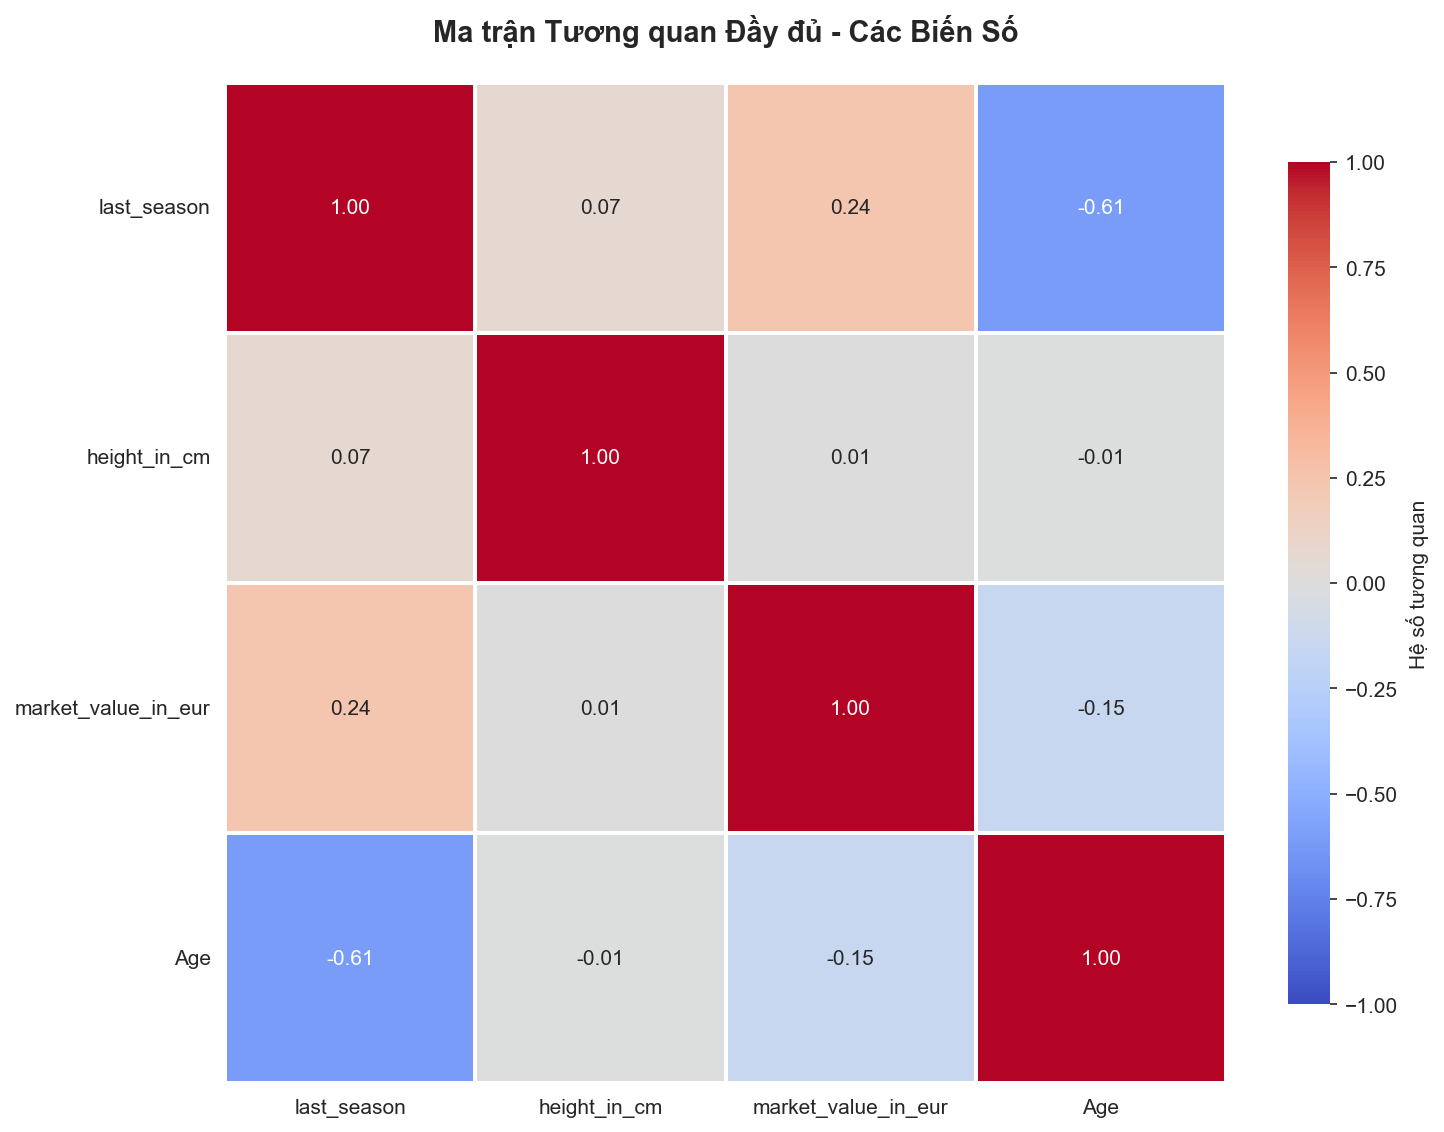

In [84]:
# Correlation Heatmap - Ma trận tương quan đầy đủ
if len(numerical_cols) >= 2:
    fig, ax = plt.subplots(figsize=(10, 8), dpi=150)
    
    # Vẽ heatmap đầy đủ (không dùng mask)
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": 0.8, "label": "Hệ số tương quan"},
                vmin=-1, 
                vmax=1,
                ax=ax)
    
    ax.set_title('Ma trận Tương quan Đầy đủ - Các Biến Số', 
                 fontsize=14, fontweight='bold', pad=20)
    plt.xticks(rotation=0, ha='center', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Cần ít nhất 2 biến số để vẽ ma trận tương quan.")


### ➤ NHẬN XÉT & PHÂN TÍCH TƯƠNG QUAN

#### **1. "Nghịch lý" Tuổi tác và Giá trị (The Age-Value Paradox)**
*   **Insight:** Hệ số tương quan giữa `Age` và `market_value_in_eur` là **-0.15** (tương quan âm yếu). Điều này phản ánh thực tế phức tạp của thị trường chuyển nhượng:
    *   Cầu thủ quá trẻ (U18) thường chưa có giá trị cao vì chưa khẳng định được mình.
    *   Cầu thủ ở độ chín (24-28 tuổi) có giá trị cao nhất.
    *   Cầu thủ lớn tuổi (>30) bị giảm giá trị nhanh chóng do rủi ro chấn thương và thời gian thi đấu còn lại ngắn.
*   **Kết luận:** Mối quan hệ này là **phi tuyến tính (non-linear)**, nên hệ số tương quan tuyến tính (Pearson) thấp không có nghĩa là không có mối liên hệ. Cần vẽ biểu đồ phân tán (Scatter Plot) hoặc dùng mô hình phi tuyến tính để thấy rõ "đỉnh cao phong độ" (peak performance age).

#### **2. Chiều cao không định đoạt giá trị**
*   **Insight:** Tương quan giữa `height_in_cm` và `market_value_in_eur` gần như bằng **0 (0.01)**.
*   **Giải thích:**
    *   Trong bóng đá hiện đại, kỹ năng và tư duy chiến thuật (IQ bóng đá) quan trọng hơn nhiều so với thể hình thuần túy (trừ một số vị trí đặc thù như Thủ môn hay Trung vệ).
    *   Một cầu thủ nhỏ con nhưng khéo léo (như Messi, Kante) vẫn có giá trị chuyển nhượng khổng lồ. Việc đánh giá cầu thủ không nên bị thiên kiến (biased) bởi thể hình.

#### **3. Hiệu ứng "Mùa giải gần nhất" (Recency Bias)**
*   **Insight:** Có sự tương quan dương (**0.24**) giữa `last_season` và `market_value_in_eur`.
*   **Giải thích:**
    *   Điều này gợi ý sự **lạm phát cầu thủ (player inflation)** theo thời gian. Giá trị chuyển nhượng trung bình có xu hướng tăng qua các năm.
    *   Ngoài ra, những cầu thủ có dữ liệu ở các mùa giải gần đây (2023, 2024) thường là những người đang thi đấu đỉnh cao, trong khi dữ liệu cũ (2012, 2013) có thể thuộc về những cầu thủ đã giải nghệ hoặc qua thời đỉnh cao (giá trị thấp).

#### **4. Mối quan hệ Tuổi tác - Thời gian (Age vs. Last Season)**
*   **Insight:** Tương quan âm mạnh (**-0.61**) giữa `Age` và `last_season` là một tín hiệu nhiễu (artifact) của dữ liệu.
*   **Giải thích:** Những bản ghi từ các mùa giải cũ (ví dụ 2012) tất nhiên sẽ có độ tuổi hiện tại (tính đến 2024) cao hơn. Đây là đặc điểm của cách thu thập dữ liệu (snapshot tại thời điểm đó hay tính tuổi hiện tại) chứ không mang nhiều ý nghĩa về mặt hiệu suất cầu thủ.

#### **Hướng đi tiếp theo:**
1.  **Phân tích sâu hơn:** Mối quan hệ `Age` vs `Market Value` theo từng nhóm vị trí (Ví dụ: Thủ môn thường đạt đỉnh muộn hơn Tiền đạo).
2.  **Kiểm tra dữ liệu:** Kiểm tra lại cách tính tuổi (`Age`): Là tuổi tại thời điểm `last_season` hay tuổi hiện tại? Điều này ảnh hưởng lớn đến việc diễn giải dữ liệu.


In [86]:
# Phân tích các cặp tương quan mạnh
if len(numerical_cols) >= 2:
    print("=" * 80)
    print("CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH")
    print("=" * 80)
    
    # Tìm các cặp tương quan mạnh (loại trừ đường chéo)
    strong_correlations = []
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) >= 0.5:  # Ngưỡng cho tương quan "mạnh"
                strong_correlations.append({
                    'Variable_1': correlation_matrix.columns[i],
                    'Variable_2': correlation_matrix.columns[j],
                    'Correlation': corr_value,
                    'Strength': 'Rất mạnh' if abs(corr_value) >= 0.8 else 'Mạnh',
                    'Direction': 'Thuận' if corr_value > 0 else 'Nghịch'
                })
    
    if strong_correlations:
        # Sắp xếp theo giá trị tuyệt đối của correlation
        strong_correlations = sorted(strong_correlations, 
                                    key=lambda x: abs(x['Correlation']), 
                                    reverse=True)
        
        print(f"\nTìm thấy {len(strong_correlations)} cặp biến có tương quan mạnh (|r| ≥ 0.5):\n")
        
        for idx, corr in enumerate(strong_correlations, 1):
            symbol = "📈" if corr['Direction'] == 'Thuận' else "📉"
            print(f"{idx}. {symbol} {corr['Variable_1']} <--> {corr['Variable_2']}")
            print(f"   Hệ số tương quan: {corr['Correlation']:.3f} (Tương quan {corr['Strength']} {corr['Direction']})")
            print()
    else:
        print("\n Không tìm thấy cặp biến nào có tương quan mạnh (|r| ≥ 0.5)")
        print("   Tất cả các biến số tương đối độc lập với nhau")

CÁC CẶP BIẾN CÓ TƯƠNG QUAN MẠNH

Tìm thấy 1 cặp biến có tương quan mạnh (|r| ≥ 0.5):

1. 📉 last_season <--> Age
   Hệ số tương quan: -0.613 (Tương quan Mạnh Nghịch)



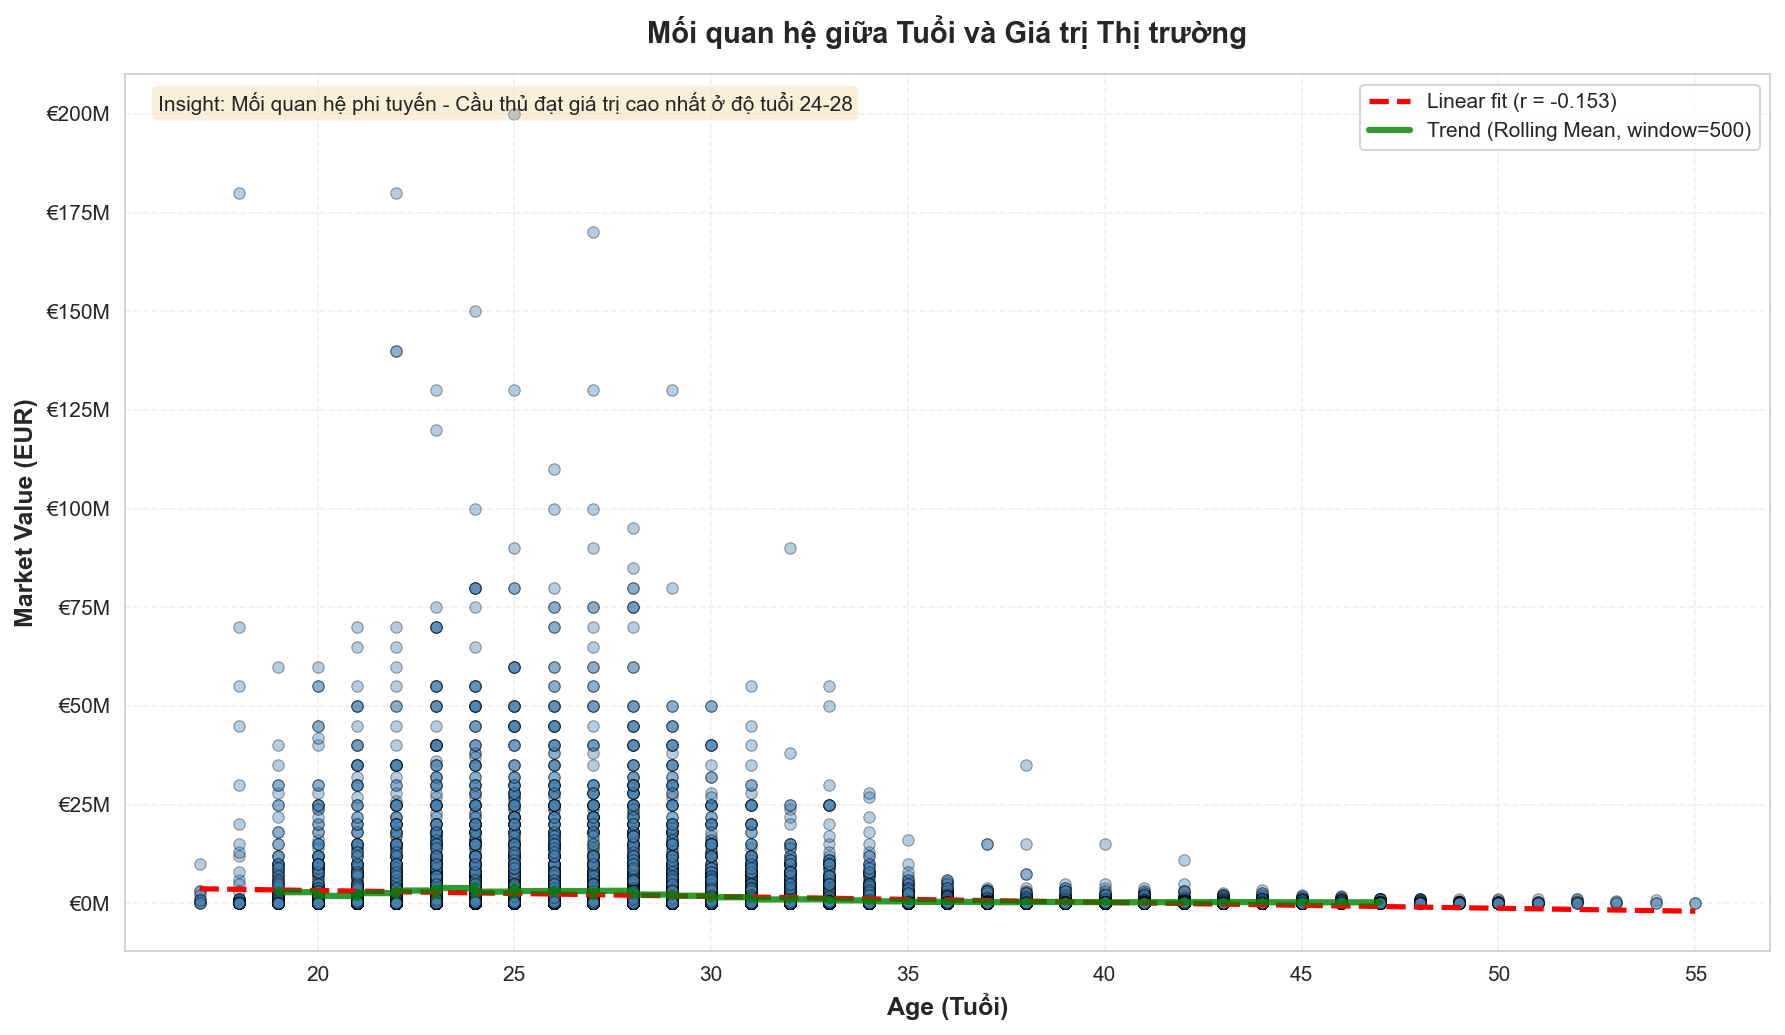

PHÂN TÍCH CHI TIẾT: AGE vs MARKET_VALUE_IN_EUR

Hệ số tương quan Pearson: -0.1535

Giá trị trung bình theo nhóm tuổi:
           Count  Mean_Value  Median_Value    Max_Value
age_group                                              
16-20        314  3900844.00     500000.00 180000000.00
21-24       4255  2582662.00     300000.00 180000000.00
25-28       6447  2959429.00     350000.00 200000000.00
29-32       6995  1851692.00     300000.00 130000000.00
33-40       9612   596223.00     200000.00  90000000.00
40+         3423   284492.00     200000.00  15000000.00

🏆 Nhóm tuổi có giá trị TB cao nhất: 16-20 (€3,900,844)


In [ ]:
# Scatter plot cho tương quan giữa Age và market_value_in_eur
fig, ax = plt.subplots(figsize=(12, 7), dpi=150)

# Loại bỏ giá trị NaN để vẽ chính xác
temp_df = df[['Age', 'market_value_in_eur']].dropna()
x_data = temp_df['Age']
y_data = temp_df['market_value_in_eur']

# Vẽ scatter plot
ax.scatter(x_data, y_data, alpha=0.4, s=30, c='steelblue', edgecolors='black', linewidth=0.5)

# Thêm đường hồi quy tuyến tính
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
x_line = np.linspace(x_data.min(), x_data.max(), 100)
ax.plot(x_line, p(x_line), "r--", linewidth=2.5, label=f'Linear fit (r = {df[["Age", "market_value_in_eur"]].corr().iloc[0,1]:.3f})')

# Thêm đường trung bình động (moving average) để thấy xu hướng phi tuyến
age_sorted = temp_df.sort_values('Age')
window_size = 500
rolling_mean = age_sorted['market_value_in_eur'].rolling(window=window_size, center=True).mean()
ax.plot(age_sorted['Age'], rolling_mean, color='green', linewidth=3, 
    label=f'Trend (Rolling Mean, window={window_size})', alpha=0.8)

# Thiết lập nhãn và tiêu đề
ax.set_xlabel('Age (Tuổi)', fontsize=12, fontweight='bold')
ax.set_ylabel('Market Value (EUR)', fontsize=12, fontweight='bold')
ax.set_title('Mối quan hệ giữa Tuổi và Giá trị Thị trường', 
         fontsize=14, fontweight='bold', pad=15)

# Định dạng trục y với ký hiệu triệu
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'€{x/1e6:.0f}M'))

# Thêm lưới và chú thích
ax.grid(alpha=0.3, linestyle='--')
ax.legend(loc='upper right', fontsize=10)

# Thêm annotation cho insight
ax.text(0.02, 0.98, 
    'Insight: Mối quan hệ phi tuyến - Cầu thủ đạt giá trị cao nhất ở độ tuổi 24-28',
    transform=ax.transAxes, fontsize=10, verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# In thống kê bổ sung
print("=" * 80)
print("PHÂN TÍCH CHI TIẾT: AGE vs MARKET_VALUE_IN_EUR")
print("=" * 80)

print(f"\nHệ số tương quan Pearson: {df[['Age', 'market_value_in_eur']].corr().iloc[0,1]:.4f}")

# Phân tích theo nhóm tuổi
age_bins = [16, 20, 24, 28, 32, 40, 60]
age_labels = ['16-20', '21-24', '25-28', '29-32', '33-40', '40+']
temp_df['age_group'] = pd.cut(temp_df['Age'], bins=age_bins, labels=age_labels, right=False)

age_group_stats = temp_df.groupby('age_group')['market_value_in_eur'].agg([
    ('Count', 'count'),
    ('Mean_Value', 'mean'),
    ('Median_Value', 'median'),
    ('Max_Value', 'max')
]).round(0)

print("\nGiá trị trung bình theo nhóm tuổi:")
print(age_group_stats)

# Tìm nhóm tuổi có giá trị cao nhất
peak_age_group = age_group_stats['Mean_Value'].idxmax()
peak_value = age_group_stats['Mean_Value'].max()
print(f"\n Nhóm tuổi có giá trị TB cao nhất: {peak_age_group} (€{peak_value:,.0f})")

### **➤ NHẬN XÉT:**

#### 1. Xác định "Độ tuổi vàng" (The Prime Age Window)
*   **Quan sát:** Đường xu hướng (màu xanh) đạt đỉnh ở khoảng **24-28 tuổi**.
*   **Insight:** Đây là giai đoạn "chín" của sự nghiệp cầu thủ, nơi hội tụ đủ cả thể chất (tốc độ, sức mạnh) và kinh nghiệm (tư duy chiến thuật).
*   **Chiến lược CLB:**
    *   **Buying Club:** Mua cầu thủ ở giai đoạn **21-23 tuổi** (trước đỉnh) để tối ưu hóa hiệu suất và giá trị bán lại sau này.
    *   **Selling Club:** Bán cầu thủ khi họ chạm mốc **28-29 tuổi** để tối đa hóa lợi nhuận trước khi giá trị bắt đầu trượt dốc.

#### 2. Định giá dựa trên Tiềm năng (Premium for Potential)
*   **Quan sát:** Ở độ tuổi rất trẻ (17-21), mặc dù giá trị trung bình thấp, nhưng có rất nhiều điểm ngoại lai (outliers) vọt lên cao (các chấm > €50M - €100M).
*   **Insight:** Thị trường bóng đá trả giá cực cao cho **"Potential" (Tiềm năng)**. Một cầu thủ 19 tuổi có chỉ số tương đương một cầu thủ 28 tuổi thường sẽ đắt gấp đôi hoặc gấp ba vì họ là một "tài sản đầu tư" dài hạn. Những điểm ngoại lai này chính là các *Wonderkids* (như Lamine Yamal, Jude Bellingham).
*   **Lưu ý cho mô hình:** Nếu xây dựng mô hình dự đoán giá, cần có một biến đặc trưng (feature) để "thưởng" cho các cầu thủ trẻ có chỉ số cao, tránh việc mô hình đánh giá thấp họ chỉ vì họ chưa có bề dày thành tích.

#### 3. Sự sụt giảm phi tuyến tính sau tuổi 30 (The Post-30 Depreciation)
*   **Quan sát:** Sau tuổi 30, đường xu hướng đi xuống rất dốc và độ phân tán thu hẹp lại (ít cầu thủ giá cao).
*   **Insight:** Đây là rủi ro về mặt **"khấu hao tài sản"**. Dù cầu thủ vẫn thi đấu tốt (như Lewandowski, Messi), giá trị chuyển nhượng vẫn giảm sâu vì thời gian sử dụng còn lại ngắn và rủi ro chấn thương tăng.
*   **Chiến lược:** Các hợp đồng cho cầu thủ trên 30 tuổi thường là ngắn hạn (1-2 năm) hoặc chuyển nhượng tự do (free transfer) để tránh rủi ro mất vốn.

#### 4. Nhóm "Hidden Gems" (Viên ngọc ẩn)
*   **Quan sát:** Có một lượng lớn các điểm dữ liệu nằm sát trục hoành (giá trị thấp) ở độ tuổi 20-24.
*   **Insight:** Đây là khu vực mà các **Scout (Tuyển trạch viên)** hoạt động mạnh nhất. Nhiệm vụ của Data Scientist là dùng các chỉ số khác (như số liệu chuyên môn, thể chất) để tìm ra trong đám đông giá rẻ này những cầu thủ bị định giá thấp (undervalued) nhưng có hiệu suất thi đấu cao.

**➤ KẾT LUẬN:** Biểu đồ này là nền tảng để xây dựng chiến lược chuyển nhượng. Tuy nhiên, nên phân tách biểu đồ này theo từng vị trí (Position), vì "độ tuổi vàng" của Thủ môn sẽ khác hoàn toàn với Tiền đạo cánh.


In [ ]:
# Categorical × Categorical Cross-tabulation
print("=" * 80)
print("CROSS-TABULATION ANALYSIS - CATEGORICAL VARIABLES")
print("=" * 80)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Filter to columns with reasonable number of categories (2-10)
suitable_cat_cols = [col for col in categorical_cols 
                     if 2 <= df[col].nunique() <= 10]

print(f"\nFound {len(suitable_cat_cols)} suitable categorical columns for cross-tabulation")
print(f"(Columns with 2-10 unique values)")

if len(suitable_cat_cols) >= 2:
    # Example: Cross-tab for first two suitable columns
    col1, col2 = suitable_cat_cols[0], suitable_cat_cols[1]
    
    print(f"\nCross-tabulation: {col1} × {col2}\n")
    
    # Create cross-tabulation
    crosstab = pd.crosstab(df[col1], df[col2], margins=True)
    print(crosstab)
    
    # Normalized version (percentages)
    print(f"\nNormalized Cross-tabulation (Row Percentages):\n")
    crosstab_norm = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    print(crosstab_norm.round(2))


CROSS-TABULATION ANALYSIS - CATEGORICAL VARIABLES

Found 2 suitable categorical columns for cross-tabulation
(Columns with 2-10 unique values)

📊 Cross-tabulation: position × foot

foot        both  left  right    All
position                            
Attack       512  1790   5987   8289
Defender     312  3408   6092   9812
Goalkeeper    88   423   2669   3180
Midfield     468  1889   6358   8715
Missing        6    20     43     69
All         1386  7530  21149  30065

📊 Normalized Cross-tabulation (Row Percentages):

foot        both  left  right
position                     
Attack      6.18 21.59  72.23
Defender    3.18 34.73  62.09
Goalkeeper  2.77 13.30  83.93
Midfield    5.37 21.68  72.95
Missing     8.70 28.99  62.32


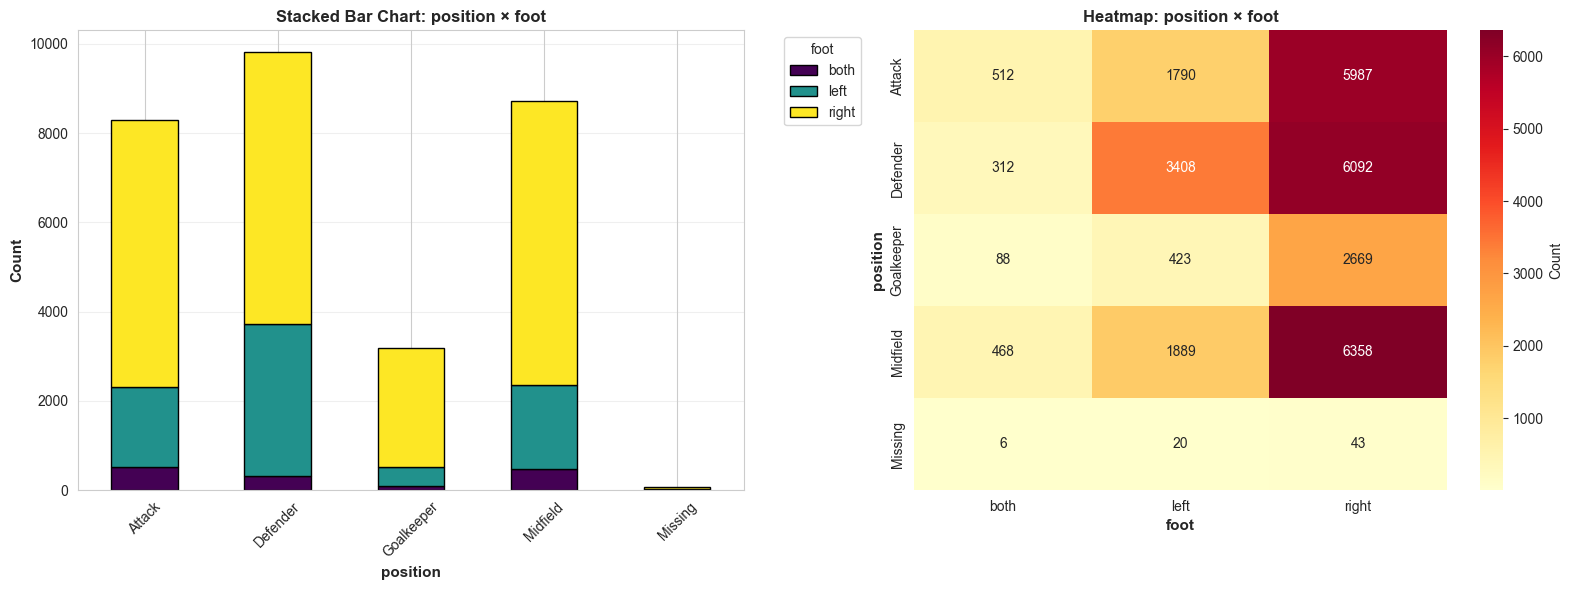

In [ ]:
# Visualize Categorical Relationships
if len(suitable_cat_cols) >= 2:
    col1, col2 = suitable_cat_cols[0], suitable_cat_cols[1]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Stacked bar chart
    crosstab_plot = pd.crosstab(df[col1], df[col2])
    crosstab_plot.plot(kind='bar', stacked=True, ax=axes[0], 
                       colormap='viridis', edgecolor='black')
    axes[0].set_title(f'Stacked Bar Chart: {col1} × {col2}', 
                      fontsize=12, fontweight='bold')
    axes[0].set_xlabel(col1, fontsize=11, fontweight='bold')
    axes[0].set_ylabel('Count', fontsize=11, fontweight='bold')
    axes[0].legend(title=col2, bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Heatmap
    sns.heatmap(crosstab_plot, annot=True, fmt='d', cmap='YlOrRd', 
                ax=axes[1], cbar_kws={'label': 'Count'})
    axes[1].set_title(f'Heatmap: {col1} × {col2}', 
                      fontsize=12, fontweight='bold')
    axes[1].set_xlabel(col2, fontsize=11, fontweight='bold')
    axes[1].set_ylabel(col1, fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Numerical × Categorical Analysis
print("=" * 80)
print("GROUPED ANALYSIS - NUMERICAL × CATEGORICAL")
print("=" * 80)

if len(numerical_cols) >= 1 and len(suitable_cat_cols) >= 1:
    # Example: Group numerical column by categorical column
    num_col = numerical_cols[0]
    cat_col = suitable_cat_cols[0]
    
    print(f"\nGrouped Statistics: {num_col} grouped by {cat_col}\n")
    
    # Calculate group statistics
    grouped_stats = df.groupby(cat_col)[num_col].agg([
        ('Count', 'count'),
        ('Mean', 'mean'),
        ('Median', 'median'),
        ('Std', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ]).round(2)
    
    print(grouped_stats)

GROUPED ANALYSIS - NUMERICAL × CATEGORICAL

📊 Grouped Statistics: last_season grouped by position

            Count    Mean  Median  Std   Min   Max
position                                          
Attack       8921 2019.40 2020.00 3.93  2012  2024
Defender    10389 2019.39 2020.00 3.97  2012  2024
Goalkeeper   3720 2019.53 2020.00 3.93  2012  2024
Midfield     9391 2019.28 2020.00 3.97  2012  2024
Missing       180 2016.09 2015.00 3.51  2012  2024


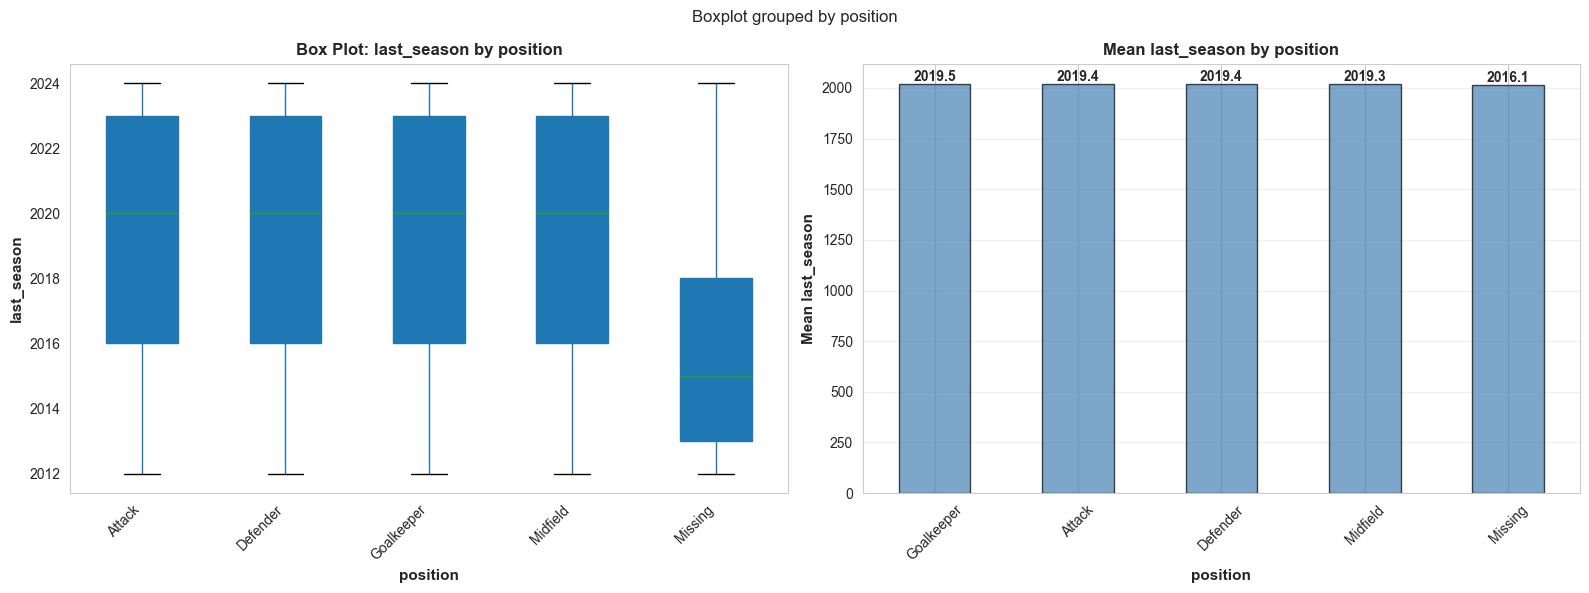

In [ ]:
# Visualize Numerical × Categorical
if len(numerical_cols) >= 1 and len(suitable_cat_cols) >= 1:
    num_col = numerical_cols[0]
    cat_col = suitable_cat_cols[0]
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Box plot
    df.boxplot(column=num_col, by=cat_col, ax=axes[0], 
               patch_artist=True, grid=False)
    axes[0].set_title(f'Box Plot: {num_col} by {cat_col}', 
                      fontsize=12, fontweight='bold')
    axes[0].set_xlabel(cat_col, fontsize=11, fontweight='bold')
    axes[0].set_ylabel(num_col, fontsize=11, fontweight='bold')
    plt.sca(axes[0])
    plt.xticks(rotation=45, ha='right')
    
    # Bar plot of means
    grouped_means = df.groupby(cat_col)[num_col].mean().sort_values(ascending=False)
    grouped_means.plot(kind='bar', ax=axes[1], color='steelblue', 
                       edgecolor='black', alpha=0.7)
    axes[1].set_title(f'Mean {num_col} by {cat_col}', 
                      fontsize=12, fontweight='bold')
    axes[1].set_xlabel(cat_col, fontsize=11, fontweight='bold')
    axes[1].set_ylabel(f'Mean {num_col}', fontsize=11, fontweight='bold')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, v in enumerate(grouped_means):
        axes[1].text(i, v, f'{v:.1f}', ha='center', va='bottom', 
                     fontweight='bold')
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Summary of Key Observations
print("=" * 80)
print("KEY OBSERVATIONS FROM DATA EXPLORATION")
print("=" * 80)

print("\nOBSERVATION 1: Dataset Structure")
print(f"   • Total records: {len(df):,} rows × {len(df.columns)} columns")
print(f"   • Numerical variables: {len(numerical_cols)}")
print(f"   • Categorical variables: {len(categorical_cols)}")
print(f"   • Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

if len(missing_data) > 0:
    print("\nOBSERVATION 2: Data Quality Issues")
    print(f"   • Columns with missing values: {len(missing_data)}")
    print(f"   • Overall missingness: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")
    if len(missing_data) > 0:
        worst_col = missing_data.iloc[0]
        print(f"   • Most affected column: '{worst_col['Column']}' ({worst_col['Missing_Percentage']:.1f}% missing)")

if len(numerical_cols) >= 2 and strong_correlations:
    print("\nOBSERVATION 3: Strong Relationships")
    print(f"   • Found {len(strong_correlations)} strong correlations (|r| ≥ 0.5)")
    if strong_correlations:
        top_corr = strong_correlations[0]
        print(f"   • Strongest correlation: {top_corr['Variable_1']} ↔ {top_corr['Variable_2']} (r = {top_corr['Correlation']:.3f})")

print("\nOBSERVATION 4: Variable Distributions")
# Check for skewed distributions
for col in numerical_cols[:3]:  # Check first 3 numerical columns
    skewness = df[col].skew()
    if abs(skewness) > 1:
        direction = "right" if skewness > 0 else "left"
        print(f"   • '{col}' is highly skewed {direction} (skewness: {skewness:.2f})")

print("\nOBSERVATION 5: Potential Analysis Directions")
print("   Based on the exploration, interesting questions could include:")
print("   • Predictive modeling opportunities (if target variable exists)")
print("   • Clustering or segmentation analysis")
print("   • Trend analysis (if temporal data exists)")
print("   • Feature importance and relationships")


KEY OBSERVATIONS FROM DATA EXPLORATION

🔍 OBSERVATION 1: Dataset Structure
   • Total records: 32,601 rows × 13 columns
   • Numerical variables: 4
   • Categorical variables: 9
   • Memory usage: 19.57 MB

🔍 OBSERVATION 2: Data Quality Issues
   • Columns with missing values: 9
   • Overall missingness: 8.93%
   • Most affected column: 'agent_name' (49.1% missing)

🔍 OBSERVATION 3: Strong Relationships
   • Found 1 strong correlations (|r| ≥ 0.5)
   • Strongest correlation: last_season ↔ Age (r = -0.613)

🔍 OBSERVATION 4: Variable Distributions
   • 'height_in_cm' is highly skewed left (skewness: -2.14)
   • 'market_value_in_eur' is highly skewed right (skewness: 11.36)

🔍 OBSERVATION 5: Potential Analysis Directions
   Based on the exploration, interesting questions could include:
   • Predictive modeling opportunities (if target variable exists)
   • Clustering or segmentation analysis
   • Trend analysis (if temporal data exists)
   • Feature importance and relationships


In [ ]:
# Data Quality Red Flags
print("\n" + "=" * 80)
print("⚠️  DATA QUALITY RED FLAGS & LIMITATIONS")
print("=" * 80)

red_flags = []

# Check for high missingness
if len(missing_data) > 0:
    critical_missing = missing_data[missing_data['Missing_Percentage'] > 50]
    if len(critical_missing) > 0:
        red_flags.append(f" {len(critical_missing)} column(s) with >50% missing data")

# Check for duplicate rows
n_duplicates = df.duplicated().sum()
if n_duplicates > 0:
    red_flags.append(f" {n_duplicates:,} duplicate rows detected ({n_duplicates/len(df)*100:.2f}%)")

# Check for single-value columns
single_value_cols = [col for col in df.columns if df[col].nunique() == 1]
if single_value_cols:
    red_flags.append(f" {len(single_value_cols)} column(s) with only one unique value (consider dropping)")

# Check for high cardinality categorical columns
high_card_cols = [col for col in categorical_cols if df[col].nunique() > 100]
if high_card_cols:
    red_flags.append(f" {len(high_card_cols)} categorical column(s) with >100 unique values (may need grouping)")

# Check for potential outliers
for col in numerical_cols[:5]:  # Check first 5 numerical columns
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    if outliers > len(df) * 0.05:  # More than 5% outliers
        red_flags.append(f" '{col}' has {outliers:,} outliers ({outliers/len(df)*100:.1f}%)")

if red_flags:
    print("\n⚠️  Identified Issues:\n")
    for flag in red_flags:
        print(f"   {flag}")
else:
    print("\n No critical data quality issues detected!")

print("\n📋 Analysis Limitations:")
print("   • Results are limited to the available data and may not generalize")
print("   • Missing data handling may introduce bias")
print("   • Correlation does not imply causation")
print("   • Outliers may significantly affect statistical measures")

# Cell 17: Required Preprocessing Steps
print("\n" + "=" * 80)
print("📝 RECOMMENDED PREPROCESSING STEPS")
print("=" * 80)

preprocessing_steps = []

if len(missing_data) > 0:
    preprocessing_steps.append("1️⃣ Handle missing values (imputation or removal)")

if n_duplicates > 0:
    preprocessing_steps.append("2️⃣ Remove duplicate rows")

if single_value_cols:
    preprocessing_steps.append("3️⃣ Drop columns with single unique value")

# Check if encoding needed
if len(categorical_cols) > 0:
    preprocessing_steps.append("4️⃣ Encode categorical variables (Label/One-Hot encoding)")

# Check if scaling needed
if len(numerical_cols) > 0:
    preprocessing_steps.append("5️⃣ Scale/normalize numerical features (StandardScaler/MinMaxScaler)")

# Check for outliers
if any('outliers' in flag.lower() for flag in red_flags):
    preprocessing_steps.append("6️⃣ Handle outliers (capping, transformation, or removal)")

# Check for skewness
highly_skewed = [col for col in numerical_cols if abs(df[col].skew()) > 1]
if highly_skewed:
    preprocessing_steps.append("7️⃣ Transform skewed features (log, sqrt, Box-Cox)")

if high_card_cols:
    preprocessing_steps.append("8️⃣ Reduce cardinality of high-dimensional categorical features")

preprocessing_steps.append("9️⃣ Feature engineering (create new meaningful features)")
preprocessing_steps.append("🔟 Train-test split for modeling")

print("\nBefore analysis, consider these preprocessing steps:\n")
for step in preprocessing_steps:
    print(f"   {step}")

print("\n" + "=" * 80)
print("✅ DATA EXPLORATION COMPLETE!")
print("=" * 80)
print("\nNext Steps:")
print("   → Formulate 2×n research questions based on these insights")
print("   → Begin data preprocessing and analysis for each question")
print("   → Build and evaluate machine learning models where applicable")
print("=" * 80)


⚠️  DATA QUALITY RED FLAGS & LIMITATIONS

⚠️  Identified Issues:

   🚩 6 categorical column(s) with >100 unique values (may need grouping)
   🚩 'market_value_in_eur' has 4,387 outliers (13.5%)

📋 Analysis Limitations:
   • Results are limited to the available data and may not generalize
   • Missing data handling may introduce bias
   • Correlation does not imply causation
   • Outliers may significantly affect statistical measures

📝 RECOMMENDED PREPROCESSING STEPS

Before analysis, consider these preprocessing steps:

   1️⃣ Handle missing values (imputation or removal)
   4️⃣ Encode categorical variables (Label/One-Hot encoding)
   5️⃣ Scale/normalize numerical features (StandardScaler/MinMaxScaler)
   6️⃣ Handle outliers (capping, transformation, or removal)
   7️⃣ Transform skewed features (log, sqrt, Box-Cox)
   8️⃣ Reduce cardinality of high-dimensional categorical features
   9️⃣ Feature engineering (create new meaningful features)
   🔟 Train-test split for modeling

✅ DATA EX